In [1]:
import os
import sys
sys.path.append("../")
from concerto_function5_3 import *
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, silhouette_samples

In [3]:
#Select an available GPU to run on a multi-GPU computer or you can run it directly on the CPU without executing this cell
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '4' 
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
path = './data/multi_gene_l2.loom'
adata_RNA = sc.read(path)
path = './data/multi_protein_l2.loom'
adata_Protein = sc.read(path) #cell_type batch

# preprocess

In [ ]:
adata_RNA = preprocessing_rna(adata_RNA,min_features = 0,is_hvg=False,batch_key='batch')
adata_Protein = preprocessing_rna(adata_Protein,min_features = 0,is_hvg=False,batch_key='batch')

In [ ]:
save_path = './'
if not os.path.exists(save_path):
    os.makedirs(save_path)
adata_RNA.write_h5ad(save_path + 'adata_RNA.h5ad')
adata_Protein.write_h5ad(save_path + 'adata_Protein.h5ad')

# make TF-record
TF-record is a binary file containing sequences of serialized byte-strings for the sharding file in TensorFlow, which is especially suitable for streaming data input network.

In [ ]:
RNA_tf_path = concerto_make_tfrecord(adata_RNA,tf_path = save_path + 'tfrecord/RNA_tf/',batch_col_name = 'batch')
Protein_tf_path = concerto_make_tfrecord(adata_Protein,tf_path = save_path + 'tfrecord/Protein_tf/',batch_col_name = 'batch')

# train (multimodal integration)

In [ ]:
save_path = './'
weight_path = save_path + 'weight/'
RNA_tf_path = save_path + 'tfrecord/RNA_tf/'
Protein_tf_path = save_path + 'tfrecord/Protein_tf/'
concerto_train_multimodal(RNA_tf_path,Protein_tf_path,weight_path,super_parameters={'batch_size': 64, 'epoch_pretrain': 5, 'lr': 1e-4,'drop_rate': 0.1})

# test

In [4]:
save_path = './'
weight_path = save_path + 'weight/'
RNA_tf_path = save_path + 'tfrecord/RNA_tf/'
Protein_tf_path = save_path + 'tfrecord/Protein_tf/'
saved_weight_path = './weight/weight_encoder_epoch3.h5'# You can choose a trained weight or use None to default to the weight of the last epoch.
embedding,batch,RNA_id,attention_weight =  concerto_test_multimodal(weight_path,RNA_tf_path,Protein_tf_path,n_cells_for_sample = None,super_parameters={'batch_size': 128, 'epoch_pretrain': 1, 'lr': 1e-4,'drop_rate': 0.1},saved_weight_path = saved_weight_path)

load saved weight
./tfrecord/RNA_tf/tf_6.tfrecord
./tfrecord/Protein_tf/tf_6.tfrecord
feature_len: 1000000
all_samples num:128
all_samples num:256
all_samples num:384
all_samples num:512
all_samples num:640
all_samples num:768
all_samples num:896
all_samples num:1024
all_samples num:1152
all_samples num:1280
all_samples num:1408
all_samples num:1536
all_samples num:1664
all_samples num:1792
all_samples num:1920
all_samples num:2048
all_samples num:2176
all_samples num:2304
all_samples num:2432
all_samples num:2560
all_samples num:2688
all_samples num:2816
all_samples num:2944
all_samples num:3072
all_samples num:3200
all_samples num:3328
all_samples num:3456
all_samples num:3584
all_samples num:3712
all_samples num:3840
all_samples num:3968
all_samples num:4096
all_samples num:4224
all_samples num:4352
all_samples num:4480
all_samples num:4608
all_samples num:4736
all_samples num:4864
all_samples num:4992
all_samples num:5120
all_samples num:5248
all_samples num:5376
all_samples num:55

all_samples num:9856
all_samples num:9984
all_samples num:10112
all_samples num:10240
all_samples num:10368
all_samples num:10496
all_samples num:10624
all_samples num:10752
all_samples num:10880
all_samples num:11008
all_samples num:11136
all_samples num:11264
all_samples num:11392
all_samples num:11520
all_samples num:11648
all_samples num:11776
all_samples num:11904
all_samples num:12032
all_samples num:12160
all_samples num:12288
all_samples num:12416
all_samples num:12544
all_samples num:12672
all_samples num:12800
all_samples num:12928
all_samples num:13056
all_samples num:13184
all_samples num:13312
all_samples num:13440
all_samples num:13568
all_samples num:13696
all_samples num:13824
all_samples num:13952
all_samples num:14080
all_samples num:14208
all_samples num:14336
all_samples num:14464
all_samples num:14592
all_samples num:14720
all_samples num:14848
all_samples num:14976
all_samples num:15104
all_samples num:15232
all_samples num:15360
all_samples num:15488
all_samples 

all_samples num:18688
all_samples num:18816
all_samples num:18944
all_samples num:19072
all_samples num:19200
all_samples num:19328
all_samples num:19456
all_samples num:19584
all_samples num:19712
all_samples num:19840
all_samples num:19968
all_samples num:20096
all_samples num:20224
all_samples num:20352
all_samples num:20480
all_samples num:20608
all_samples num:20736
all_samples num:20864
all_samples num:20992
all_samples num:21120
all_samples num:21248
all_samples num:21376
all_samples num:21504
all_samples num:21632
all_samples num:21760
all_samples num:21888
all_samples num:22016
all_samples num:22144
all_samples num:22272
all_samples num:22400
all_samples num:22528
all_samples num:22656
all_samples num:22784
all_samples num:22912
all_samples num:23040
all_samples num:23168
all_samples num:23296
all_samples num:23424
all_samples num:23552
all_samples num:23680
all_samples num:23808
all_samples num:23936
all_samples num:24064
all_samples num:24192
all_samples num:24320
all_sample

all_samples num:14336
all_samples num:14464
all_samples num:14592
all_samples num:14720
all_samples num:14848
all_samples num:14976
all_samples num:15104
all_samples num:15232
all_samples num:15360
all_samples num:15488
all_samples num:15616
all_samples num:15744
all_samples num:15872
all_samples num:16000
all_samples num:16128
all_samples num:16256
all_samples num:16384
all_samples num:16512
all_samples num:16640
all_samples num:16768
all_samples num:16896
all_samples num:17024
all_samples num:17152
all_samples num:17280
all_samples num:17408
all_samples num:17536
all_samples num:17664
all_samples num:17792
all_samples num:17920
all_samples num:18048
./tfrecord/RNA_tf/tf_3.tfrecord
./tfrecord/Protein_tf/tf_3.tfrecord
feature_len: 1000000
all_samples num:128
all_samples num:256
all_samples num:384
all_samples num:512
all_samples num:640
all_samples num:768
all_samples num:896
all_samples num:1024
all_samples num:1152
all_samples num:1280
all_samples num:1408
all_samples num:1536
all_sa

# cluster & plot cell embeddings

In [5]:
save_path = './'
adata_RNA = sc.read(save_path + 'adata_RNA.h5ad')
adata_RNA_1 = adata_RNA[RNA_id]
adata_RNA_1.obsm['X_embedding'] = embedding

In [6]:
l2tol1 = {'CD8 Naive': 'CD8 T',
 'CD8 Proliferating': 'CD8 T',
 'CD8 TCM': 'CD8 T',
 'CD8 TEM': 'CD8 T',
 'CD4 CTL': 'CD4 T',
 'CD4 Naive': 'CD4 T',
 'CD4 Proliferating': 'CD4 T',
 'CD4 TCM': 'CD4 T',
 'CD4 TEM': 'CD4 T',
 'Treg': 'CD4 T',
 'NK': 'NK',
 'NK Proliferating': 'NK',
 'NK_CD56bright': 'NK',
 'dnT': 'other T',
 'gdT': 'other T',
 'ILC': 'other T',
 'MAIT': 'other T',
 'CD14 Mono': 'Monocytes',
 'CD16 Mono': 'Monocytes',
 'cDC1': 'DC',
 'cDC2': 'DC',
 'pDC': 'DC',
  'ASDC':'DC',
 'B intermediate': 'B',
 'B memory': 'B',
 'B naive': 'B',
 'Plasmablast': 'B',
 'Eryth': 'other',
 'HSPC': 'other',
 'Platelet': 'other'
}
adata_RNA_1.obs['cell_type_l1'] = adata_RNA_1.obs['cell_type'].map(l2tol1)

In [7]:
adata_RNA_1

AnnData object with n_obs × n_vars = 161408 × 20729
    obs: 'batch', 'cell_type', 'n_genes', 'cell_type_l1'
    obsm: 'X_embedding'

In [8]:
sc.pp.neighbors(adata_RNA_1, use_rep="X_embedding")
labels = adata_RNA_1.obs['cell_type_l1'].tolist()
for res in [0.05,0.1,0.15,0.2,0.25,0.3]:
    sc.tl.leiden(adata_RNA_1, resolution=res)
    target_preds = adata_RNA_1.obs['leiden'].tolist()
    nmi = np.round(normalized_mutual_info_score(labels, target_preds), 5)
    ari = np.round(adjusted_rand_score(labels, target_preds), 5)    
    n_cluster = len(list(set(target_preds)))
    print('leiden(res=%f): ari = %.5f , nmi = %.5f, n_cluster = %d' % (res, ari, nmi, n_cluster),
          '.')

leiden(res=0.050000): ari = 0.79547 , nmi = 0.84024, n_cluster = 6 .
leiden(res=0.100000): ari = 0.90641 , nmi = 0.88949, n_cluster = 7 .
leiden(res=0.150000): ari = 0.86807 , nmi = 0.86505, n_cluster = 8 .
leiden(res=0.200000): ari = 0.86798 , nmi = 0.86466, n_cluster = 9 .
leiden(res=0.250000): ari = 0.83903 , nmi = 0.84787, n_cluster = 10 .
leiden(res=0.300000): ari = 0.70883 , nmi = 0.79372, n_cluster = 12 .


... storing 'cell_type_l1' as categorical


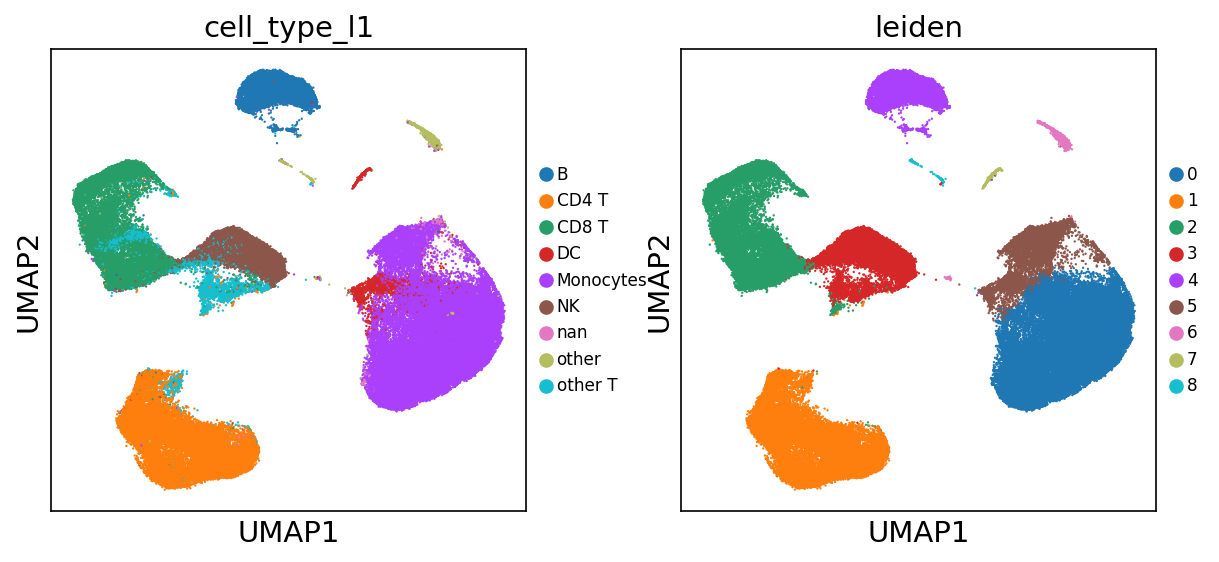

In [9]:
#sc.pp.neighbors(adata_RNA_1, use_rep='X_embedding')
sc.tl.leiden(adata_RNA_1, resolution=0.2)
sc.tl.umap(adata_RNA_1,min_dist=0.1)
sc.set_figure_params(dpi=150)
sc.pl.umap(adata_RNA_1, color=['cell_type_l1','leiden'],legend_fontsize ='xx-small',size=5,legend_fontweight='light')